# Canny Edge Detector

Having seen how the Canny filter works in the 1-D case in the theoretical exercise, we now move onto the 2-D case. In 2-D, the gradient magnitude is a measure for the strength of an edge, while direction of the gradient vector gives edge orientation. Edge detection can be done by thresholding the gradient magnitude, though this generally results in thick contours which are poorly localized. To thin the contours into single-pixel-wide lines, one should use non-maximum suppression. Pixels in the contour are kept as edge pixels only if its gradient magnitude is greater than that of its two neighboring pixels in the direction orthogonal to the edge, i.e. where the gradient is a maximum.

In [123]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter,convolve
import matplotlib.pyplot as plt
from scipy import where
import cv2
%matplotlib inline

In [124]:
### Read Image ###
im=cv2.imread('shapes.JPG', 0).astype('float')

(240, 320)


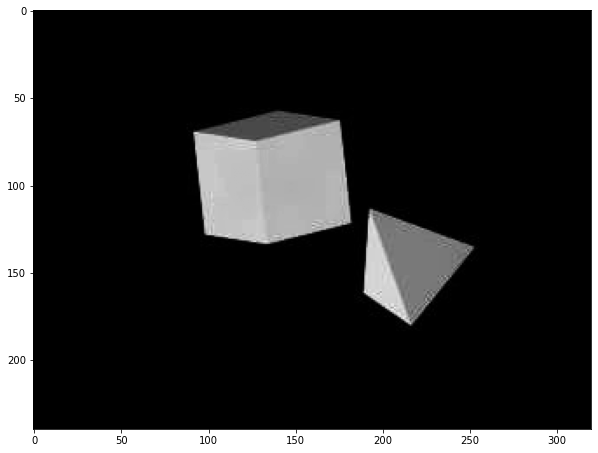

In [125]:
print(im.shape)
plt.figure(figsize=(10,10))
plt.imshow(im,cmap='gray')
plt.show()

## Gaussian Smooth Image

(240, 320)


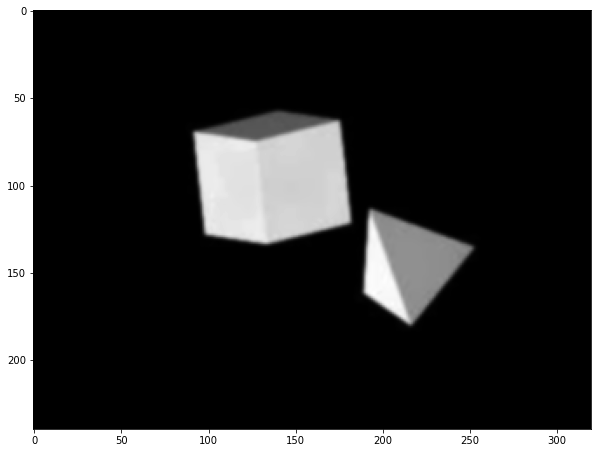

In [126]:
####### Gaussian Smooth Image #######
# TODO: Implement Gaussian Smooting
# Useful functions: gaussian_filter

blurred_im = gaussian_filter(im, sigma=1)
print(blurred_im.shape)
plt.figure(figsize=(10,10))
plt.imshow(blurred_im,cmap='gray')
plt.show()

## Gradient Image: 

In [127]:
###### Gradients x and y (Sobel filters) ######
# TODO: Implement Gradient along x and y
# Useful functions: convolve

kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

im_x = convolve(blurred_im, kernel_x)
im_y = convolve(blurred_im, kernel_y)

## Orientation Map
At each pixel, the orientation of an edge can be obtained from the direction of the gradient.
Note that edge directions α and α + π are equivalent. The resulting directions can be coded as
grey values.

In [128]:
###### gradient and direction ########
# TODO: Implement Gradient Magnitude and Direction

gradient = np.power(np.power(im_x,2) + np.power(im_y,2), 0.5) 

gradient = gradient / gradient.max() * 255

theta = np.arctan2(im_y, im_x)

## Edge image according to the threshold criteria
Each pixel at which the gradient magnitude exceeds a given threshold is displayed.

(240, 320)


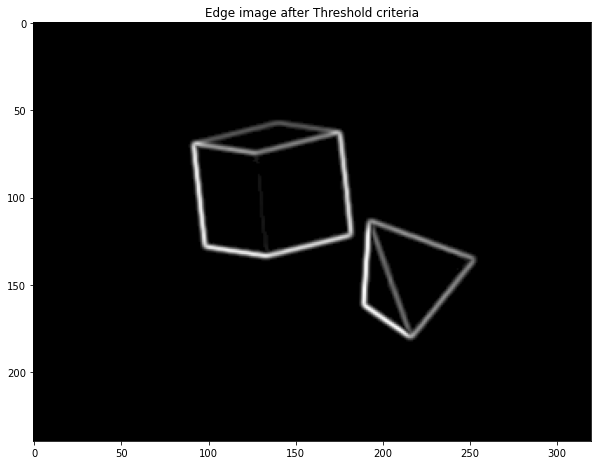

In [129]:
thresh=15;
# TODO: Implement Thresholding

mask = gradient < thresh

print(mask.shape)

thresholdEdges = np.copy(gradient)
thresholdEdges[mask] = 0

plt.figure(figsize=(10,10))
plt.title('Edge image after Threshold criteria')
plt.imshow(thresholdEdges,cmap='gray')
plt.show()

## Non-Maximum-Suppression
Each pixel which fulfills the threshold criterion and has a larger gradient magnitude than its adjacent pixels in the direction orthogonal to the edge is displayed.

In [130]:
# TODO: Implement Non-Maximum Suppression

###### Convert to degree ######
theta = np.rad2deg(theta)

###### Quantize angles ######
thetaQ = np.round((theta + 180)/ 45, 0) % 8

In [131]:
###### Non-maximum suppression ########
m, n = im.shape
edges = np.zeros((m,n))

for j in range(1, n-1):
    for i in range(1, m-1):
        if (thetaQ[i, j] == 0 or thetaQ[i, j] == 4):
            adj1 = 0
            adj2 = 1
        elif (thetaQ[i, j] == 1 or thetaQ[i, j] == 5):
            adj1 = 1
            adj2 = -1
        elif (thetaQ[i, j] == 2 or thetaQ[i, j] == 6):
            adj1 = 1
            adj2 = 0
        elif (thetaQ[i, j] == 3 or thetaQ[i, j] == 7):
            adj1 = 1
            adj2 = 1
        if (thresholdEdges[i,j] >= thresholdEdges[i+adj1, j +adj2] and thresholdEdges[i,j] >= thresholdEdges[i-adj1, j-adj2]):
            edges[i,j] = thresholdEdges[i,j]

edges = np.where(edges > 0, 1, 0)
#edges = edges[:, 0:180]

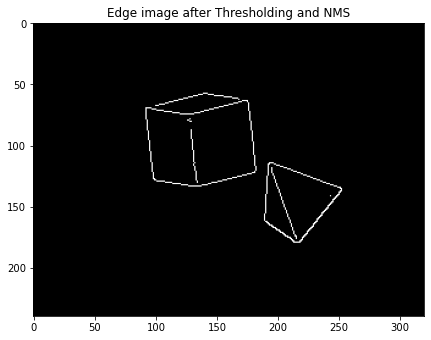

In [132]:
plt.figure(figsize=(7,7))
plt.title('Edge image after Thresholding and NMS')
plt.imshow(edges,cmap='gray')
plt.show()

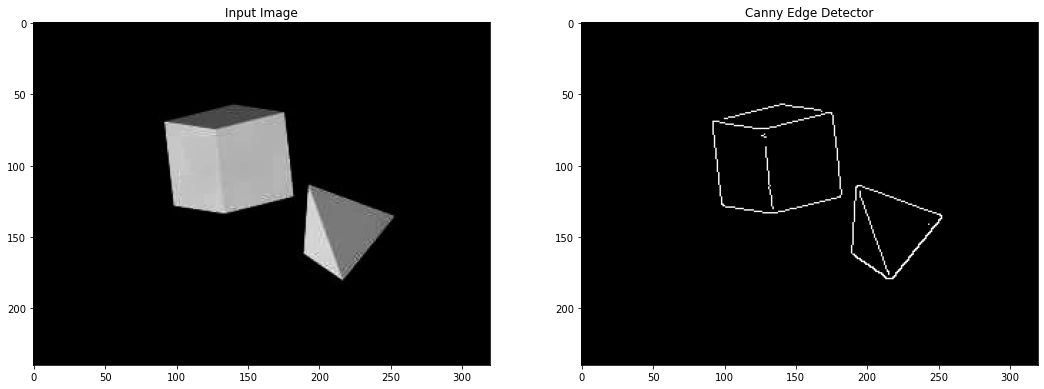

In [133]:
# Plotting of results
# No need to change it
f, ax_arr = plt.subplots(1, 2, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Canny Edge Detector")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(edges, cmap='gray')